In [2]:
import MDAnalysis
from MDAnalysis.analysis.waterdynamics import WaterOrientationalRelaxation as WOR
import matplotlib.pyplot as plt

/home/rajarshi/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hbonds/hbond_autocorrel.py:52: DeprecationWarning: This module was moved to MDAnalysis.analysis.hydrogenbonds.hbond_autocorrel; hbonds.hbond_autocorrel will be removed in 3.0.0.
  warnings.warn(wmsg, category=DeprecationWarning)


In [ ]:
##wor-wt

  0%|          | 0/99911 [00:00<?, ?it/s]

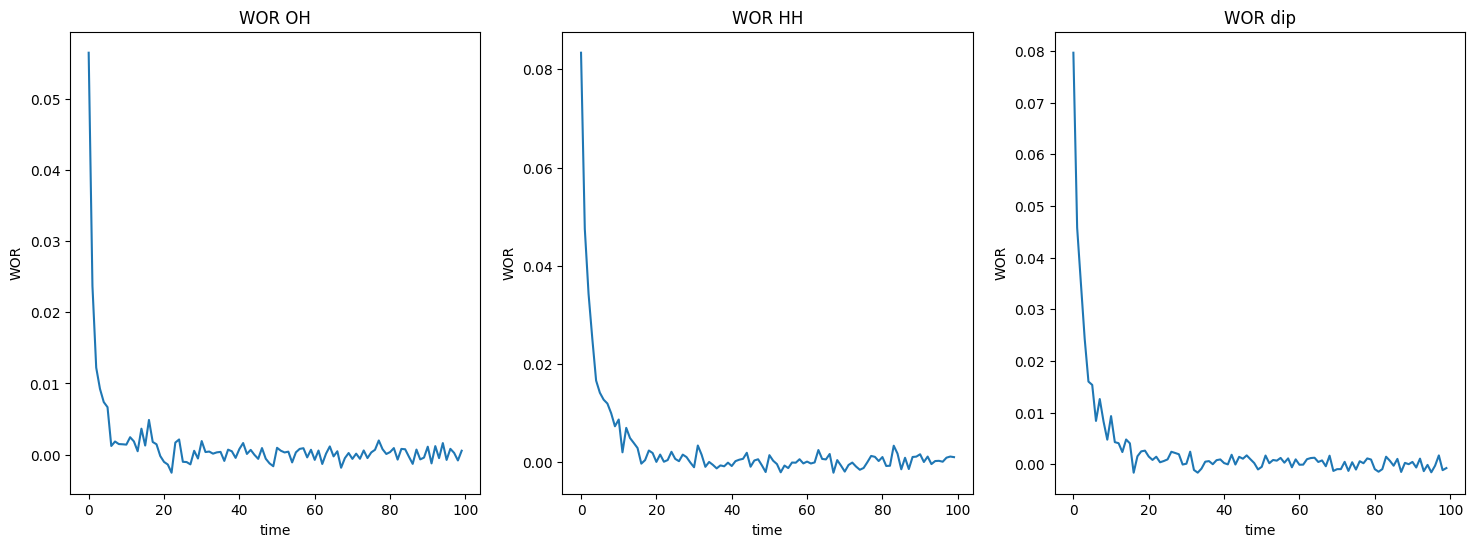

In [13]:
import matplotlib.pyplot as plt
import numpy as np

u = MDAnalysis.Universe('../../../../../../../media/rajarshi/Levinthal/water-role/free-pep/wt/aq/first-frame.gro', '../../../../../../../media/rajarshi/Levinthal/water-role/free-pep/wt/aq/trajectory_0-1000ns_nopbc.xtc')
select = "byres name OH2 and sphzone 4.203 protein"
                        
WOR_analysis = WOR(u, select, 50000, 99900, 100)
WOR_analysis.run()
time = 0

# Open a file for writing the output data
output_file_path = "wor-wt.dat"  # You can change the file name and path
with open(output_file_path, 'w') as output_file:
    time = 0
    for WOR_OH, WOR_HH, WOR_dip in WOR_analysis.timeseries:
        output_file.write("{time} {WOR_OH} {WOR_HH} {WOR_dip}\n".format(time=time, WOR_OH=WOR_OH, WOR_HH=WOR_HH, WOR_dip=WOR_dip))
        time += 1

# Plotting
plt.figure(1, figsize=(18, 6))

# WOR OH
plt.subplot(131)
plt.xlabel('time')
plt.ylabel('WOR')
plt.title('WOR OH')
plt.plot(range(0, time), [column[0] for column in WOR_analysis.timeseries])

# WOR HH
plt.subplot(132)
plt.xlabel('time')
plt.ylabel('WOR')
plt.title('WOR HH')
plt.plot(range(0, time), [column[1] for column in WOR_analysis.timeseries])

# WOR dip
plt.subplot(133)
plt.xlabel('time')
plt.ylabel('WOR')
plt.title('WOR dip')
plt.plot(range(0, time), [column[2] for column in WOR_analysis.timeseries])

plt.savefig('plot.png')  # Save the plot as an image file
plt.show()
